## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9782976	total: 48.4ms	remaining: 48.3s
1:	learn: 0.9570482	total: 49.5ms	remaining: 24.7s
2:	learn: 0.9364236	total: 50.7ms	remaining: 16.9s
3:	learn: 0.9181701	total: 53.9ms	remaining: 13.4s
4:	learn: 0.9013472	total: 55.1ms	remaining: 11s
5:	learn: 0.8834483	total: 56.2ms	remaining: 9.3s
6:	learn: 0.8660922	total: 57.3ms	remaining: 8.12s
7:	learn: 0.8492089	total: 58.4ms	remaining: 7.24s
8:	learn: 0.8339698	total: 59.5ms	remaining: 6.55s
9:	learn: 0.8169815	total: 60.5ms	remaining: 5.99s
10:	learn: 0.8033968	total: 61.5ms	remaining: 5.53s
11:	learn: 0.7889749	total: 62.7ms	remaining: 5.16s
12:	learn: 0.7732331	total: 63.8ms	remaining: 4.85s
13:	learn: 0.7583177	total: 65ms	remaining: 4.58s
14:	learn: 0.7443026	total: 66.1ms	remaining: 4.34s
15:	learn: 0.7297362	total: 67.2ms	remaining: 4.13s
16:	learn: 0.7170466	total: 68.3ms	remaining: 3.95s
17:	learn: 0.7053393	total: 69.4ms	remaining: 3.79s
18:	learn: 0.6931211	total: 70.5ms	remaining: 3.64

82:	learn: 0.3348269	total: 141ms	remaining: 1.56s
83:	learn: 0.3326478	total: 143ms	remaining: 1.56s
84:	learn: 0.3299172	total: 144ms	remaining: 1.55s
85:	learn: 0.3280462	total: 145ms	remaining: 1.54s
86:	learn: 0.3254241	total: 146ms	remaining: 1.53s
87:	learn: 0.3227025	total: 147ms	remaining: 1.53s
88:	learn: 0.3209413	total: 148ms	remaining: 1.52s
89:	learn: 0.3194424	total: 150ms	remaining: 1.51s
90:	learn: 0.3175722	total: 151ms	remaining: 1.5s
91:	learn: 0.3155691	total: 152ms	remaining: 1.5s
92:	learn: 0.3139377	total: 153ms	remaining: 1.49s
93:	learn: 0.3124133	total: 154ms	remaining: 1.48s
94:	learn: 0.3108541	total: 155ms	remaining: 1.48s
95:	learn: 0.3091779	total: 156ms	remaining: 1.47s
96:	learn: 0.3072556	total: 157ms	remaining: 1.46s
97:	learn: 0.3053855	total: 158ms	remaining: 1.46s
98:	learn: 0.3039074	total: 159ms	remaining: 1.45s
99:	learn: 0.3026446	total: 160ms	remaining: 1.44s
100:	learn: 0.3011156	total: 162ms	remaining: 1.44s
101:	learn: 0.2995552	total: 163

205:	learn: 0.2082561	total: 274ms	remaining: 1.05s
206:	learn: 0.2078135	total: 275ms	remaining: 1.05s
207:	learn: 0.2074406	total: 276ms	remaining: 1.05s
208:	learn: 0.2069652	total: 277ms	remaining: 1.05s
209:	learn: 0.2063064	total: 278ms	remaining: 1.05s
210:	learn: 0.2056757	total: 279ms	remaining: 1.04s
211:	learn: 0.2050458	total: 280ms	remaining: 1.04s
212:	learn: 0.2046725	total: 281ms	remaining: 1.04s
213:	learn: 0.2041633	total: 282ms	remaining: 1.04s
214:	learn: 0.2036661	total: 284ms	remaining: 1.03s
215:	learn: 0.2029650	total: 285ms	remaining: 1.03s
216:	learn: 0.2024155	total: 286ms	remaining: 1.03s
217:	learn: 0.2021667	total: 288ms	remaining: 1.03s
218:	learn: 0.2014901	total: 289ms	remaining: 1.03s
219:	learn: 0.2011204	total: 291ms	remaining: 1.03s
220:	learn: 0.2004595	total: 293ms	remaining: 1.03s
221:	learn: 0.2000244	total: 294ms	remaining: 1.03s
222:	learn: 0.1995333	total: 295ms	remaining: 1.03s
223:	learn: 0.1990834	total: 296ms	remaining: 1.02s
224:	learn: 

328:	learn: 0.1595170	total: 408ms	remaining: 831ms
329:	learn: 0.1591766	total: 409ms	remaining: 830ms
330:	learn: 0.1587708	total: 410ms	remaining: 828ms
331:	learn: 0.1587077	total: 411ms	remaining: 827ms
332:	learn: 0.1582759	total: 412ms	remaining: 825ms
333:	learn: 0.1581641	total: 413ms	remaining: 823ms
334:	learn: 0.1576935	total: 414ms	remaining: 822ms
335:	learn: 0.1575143	total: 415ms	remaining: 820ms
336:	learn: 0.1573646	total: 416ms	remaining: 818ms
337:	learn: 0.1570483	total: 417ms	remaining: 816ms
338:	learn: 0.1569914	total: 418ms	remaining: 815ms
339:	learn: 0.1566278	total: 419ms	remaining: 813ms
340:	learn: 0.1562111	total: 420ms	remaining: 812ms
341:	learn: 0.1559799	total: 421ms	remaining: 810ms
342:	learn: 0.1559010	total: 422ms	remaining: 808ms
343:	learn: 0.1556096	total: 423ms	remaining: 807ms
344:	learn: 0.1552520	total: 424ms	remaining: 805ms
345:	learn: 0.1550617	total: 425ms	remaining: 803ms
346:	learn: 0.1547175	total: 426ms	remaining: 802ms
347:	learn: 

454:	learn: 0.1254034	total: 542ms	remaining: 649ms
455:	learn: 0.1251036	total: 543ms	remaining: 648ms
456:	learn: 0.1248645	total: 544ms	remaining: 647ms
457:	learn: 0.1246058	total: 545ms	remaining: 645ms
458:	learn: 0.1243962	total: 546ms	remaining: 644ms
459:	learn: 0.1241255	total: 548ms	remaining: 643ms
460:	learn: 0.1239339	total: 549ms	remaining: 642ms
461:	learn: 0.1237709	total: 550ms	remaining: 640ms
462:	learn: 0.1235063	total: 551ms	remaining: 639ms
463:	learn: 0.1232221	total: 552ms	remaining: 638ms
464:	learn: 0.1231109	total: 553ms	remaining: 636ms
465:	learn: 0.1227864	total: 554ms	remaining: 635ms
466:	learn: 0.1226041	total: 555ms	remaining: 634ms
467:	learn: 0.1222994	total: 556ms	remaining: 632ms
468:	learn: 0.1219913	total: 557ms	remaining: 631ms
469:	learn: 0.1217944	total: 558ms	remaining: 629ms
470:	learn: 0.1215629	total: 559ms	remaining: 628ms
471:	learn: 0.1212988	total: 560ms	remaining: 627ms
472:	learn: 0.1210170	total: 562ms	remaining: 626ms
473:	learn: 

579:	learn: 0.1016130	total: 678ms	remaining: 491ms
580:	learn: 0.1014333	total: 679ms	remaining: 490ms
581:	learn: 0.1011815	total: 680ms	remaining: 488ms
582:	learn: 0.1008652	total: 681ms	remaining: 487ms
583:	learn: 0.1006305	total: 682ms	remaining: 486ms
584:	learn: 0.1003954	total: 683ms	remaining: 485ms
585:	learn: 0.1001597	total: 685ms	remaining: 484ms
586:	learn: 0.0999023	total: 686ms	remaining: 482ms
587:	learn: 0.0997348	total: 687ms	remaining: 481ms
588:	learn: 0.0995691	total: 688ms	remaining: 480ms
589:	learn: 0.0994275	total: 689ms	remaining: 479ms
590:	learn: 0.0993122	total: 690ms	remaining: 477ms
591:	learn: 0.0991743	total: 691ms	remaining: 476ms
592:	learn: 0.0989862	total: 692ms	remaining: 475ms
593:	learn: 0.0987949	total: 693ms	remaining: 474ms
594:	learn: 0.0986272	total: 694ms	remaining: 472ms
595:	learn: 0.0984020	total: 695ms	remaining: 471ms
596:	learn: 0.0982839	total: 696ms	remaining: 470ms
597:	learn: 0.0982367	total: 697ms	remaining: 468ms
598:	learn: 

697:	learn: 0.0851976	total: 808ms	remaining: 349ms
698:	learn: 0.0851664	total: 808ms	remaining: 348ms
699:	learn: 0.0850342	total: 809ms	remaining: 347ms
700:	learn: 0.0848117	total: 810ms	remaining: 346ms
701:	learn: 0.0847522	total: 811ms	remaining: 344ms
702:	learn: 0.0847283	total: 812ms	remaining: 343ms
703:	learn: 0.0846687	total: 813ms	remaining: 342ms
704:	learn: 0.0845774	total: 814ms	remaining: 341ms
705:	learn: 0.0844287	total: 816ms	remaining: 340ms
706:	learn: 0.0842531	total: 817ms	remaining: 338ms
707:	learn: 0.0842291	total: 818ms	remaining: 337ms
708:	learn: 0.0839740	total: 819ms	remaining: 336ms
709:	learn: 0.0837859	total: 820ms	remaining: 335ms
710:	learn: 0.0837633	total: 821ms	remaining: 334ms
711:	learn: 0.0836226	total: 822ms	remaining: 332ms
712:	learn: 0.0836006	total: 823ms	remaining: 331ms
713:	learn: 0.0834929	total: 824ms	remaining: 330ms
714:	learn: 0.0833977	total: 825ms	remaining: 329ms
715:	learn: 0.0833225	total: 826ms	remaining: 328ms
716:	learn: 

825:	learn: 0.0717571	total: 942ms	remaining: 198ms
826:	learn: 0.0716063	total: 944ms	remaining: 197ms
827:	learn: 0.0714421	total: 945ms	remaining: 196ms
828:	learn: 0.0713476	total: 946ms	remaining: 195ms
829:	learn: 0.0712890	total: 947ms	remaining: 194ms
830:	learn: 0.0712232	total: 948ms	remaining: 193ms
831:	learn: 0.0711748	total: 949ms	remaining: 192ms
832:	learn: 0.0710166	total: 950ms	remaining: 190ms
833:	learn: 0.0710032	total: 951ms	remaining: 189ms
834:	learn: 0.0708830	total: 952ms	remaining: 188ms
835:	learn: 0.0707786	total: 953ms	remaining: 187ms
836:	learn: 0.0706820	total: 954ms	remaining: 186ms
837:	learn: 0.0705217	total: 955ms	remaining: 185ms
838:	learn: 0.0703793	total: 956ms	remaining: 183ms
839:	learn: 0.0702585	total: 957ms	remaining: 182ms
840:	learn: 0.0701547	total: 958ms	remaining: 181ms
841:	learn: 0.0701396	total: 959ms	remaining: 180ms
842:	learn: 0.0701292	total: 960ms	remaining: 179ms
843:	learn: 0.0700696	total: 961ms	remaining: 178ms
844:	learn: 

947:	learn: 0.0615396	total: 1.07s	remaining: 59ms
948:	learn: 0.0613607	total: 1.08s	remaining: 57.8ms
949:	learn: 0.0612521	total: 1.08s	remaining: 56.7ms
950:	learn: 0.0612027	total: 1.08s	remaining: 55.6ms
951:	learn: 0.0611144	total: 1.08s	remaining: 54.4ms
952:	learn: 0.0610116	total: 1.08s	remaining: 53.3ms
953:	learn: 0.0609665	total: 1.08s	remaining: 52.1ms
954:	learn: 0.0608866	total: 1.08s	remaining: 51ms
955:	learn: 0.0608071	total: 1.08s	remaining: 49.9ms
956:	learn: 0.0607413	total: 1.08s	remaining: 48.7ms
957:	learn: 0.0606578	total: 1.08s	remaining: 47.6ms
958:	learn: 0.0605998	total: 1.09s	remaining: 46.4ms
959:	learn: 0.0605531	total: 1.09s	remaining: 45.3ms
960:	learn: 0.0605292	total: 1.09s	remaining: 44.2ms
961:	learn: 0.0604382	total: 1.09s	remaining: 43ms
962:	learn: 0.0602464	total: 1.09s	remaining: 41.9ms
963:	learn: 0.0601844	total: 1.09s	remaining: 40.8ms
964:	learn: 0.0601232	total: 1.09s	remaining: 39.6ms
965:	learn: 0.0600236	total: 1.09s	remaining: 38.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

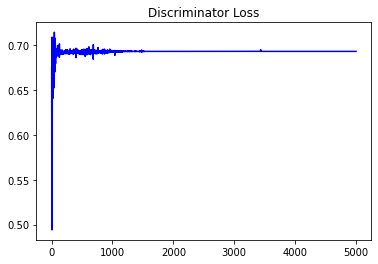

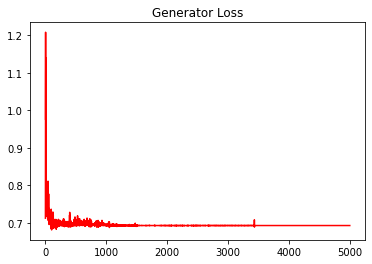

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

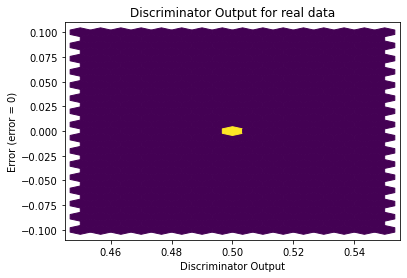

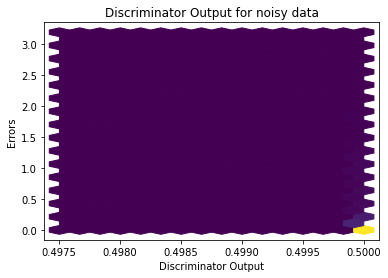

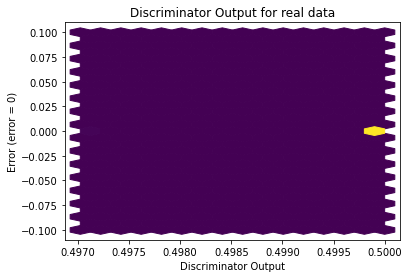

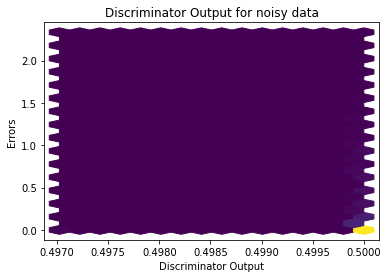

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


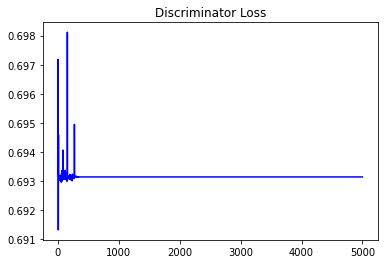

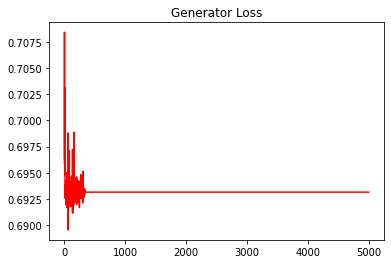

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

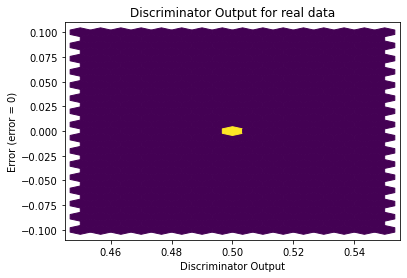

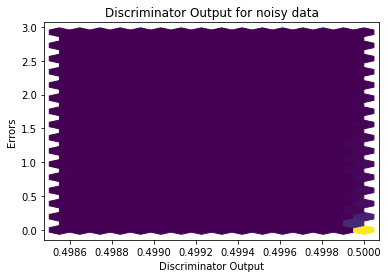

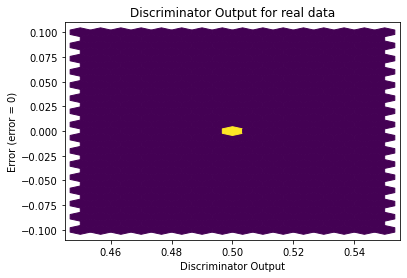

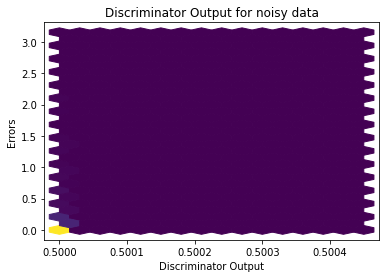

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
